In [ ]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')
with zipfile.ZipFile('/content/drive/MyDrive/Dataset_Bersih.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import MobileNetV2

# Path ke direktori dataset
dataset_dir = '/content/Dataset Bersih'

# Memuat dataset dengan shuffle diatur ke True
full_dataset = image_dataset_from_directory(dataset_dir,
                                            labels='inferred',
                                            label_mode='int',
                                            image_size=(224, 224),
                                            class_names=['mel', 'bcc', 'norm'],
                                            batch_size=32,
                                            shuffle=True)

# Memuat MobileNetV2 pre-trained model
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                     include_top=False,
                                                     weights='imagenet')
mobilenet_model.trainable = True

# Memuat DenseNet201 pre-trained model
densenet_model = tf.keras.applications.DenseNet201(input_shape=(224, 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')
densenet_model.trainable = True

# Membuat generator fitur dari dataset menggunakan MobileNetV2
mobilenet_feature_extractor = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# Membuat generator fitur dari dataset menggunakan DenseNet201
densenet_feature_extractor = tf.keras.Sequential([
    densenet_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# Inisialisasi list untuk menyimpan fitur dan label
mobilenet_features_list = []
densenet_features_list = []
labels_list = []

# Ekstrak fitur dari dataset menggunakan MobileNetV2 dan DenseNet201
for images, labels in full_dataset:
    # Ekstraksi fitur menggunakan MobileNetV2
    mobilenet_features = mobilenet_feature_extractor(images)
    mobilenet_features_list.append(mobilenet_features.numpy())

    # Ekstraksi fitur menggunakan DenseNet201
    densenet_features = densenet_feature_extractor(images)
    densenet_features_list.append(densenet_features.numpy())

    labels_list.append(labels.numpy())

# Menggabungkan fitur dan label menjadi numpy arrays
mobilenet_features_array = np.concatenate(mobilenet_features_list)
densenet_features_array = np.concatenate(densenet_features_list)
labels_array = np.concatenate(labels_list)

# Membuat DataFrame dari fitur dan label untuk MobileNetV2
mobilenet_feature_columns = [f"mobilenet_feature_{i+1}" for i in range(mobilenet_features_array.shape[1])]
mobilenet_df = pd.DataFrame(mobilenet_features_array, columns=mobilenet_feature_columns)
mobilenet_df['label'] = labels_array

# Membuat DataFrame dari fitur dan label untuk DenseNet201
densenet_feature_columns = [f"densenet_feature_{i+1}" for i in range(densenet_features_array.shape[1])]
densenet_df = pd.DataFrame(densenet_features_array, columns=densenet_feature_columns)
densenet_df['label'] = labels_array

# Tampilkan DataFrame untuk MobileNetV2
print("DataFrame untuk MobileNetV2:")
print(mobilenet_df)




Found 1725 files belonging to 3 classes.
74836368/74836368 [==============================] - 0s 0us/step
DataFrame untuk MobileNetV2:
      mobilenet_feature_1  mobilenet_feature_2  mobilenet_feature_3  \
0                0.000000             1.678070             0.000000   
1                0.109139             0.731481             0.000000   
2                0.000000             0.747617             0.000000   
3                0.000000             0.000000             0.025340   
4                0.000000             0.182050             0.022435   
...                   ...                  ...                  ...   
1720             0.000000             0.019126             0.000000   
1721             0.009861             0.289004             0.000000   
1722             0.000000             0.441140             0.000000   
1723             0.165094             0.654655             0.000000   
1724             0.000000             0.075356             0.000000   

      mobile

In [ ]:
# Tampilkan DataFrame untuk DenseNet201
print("\nDataFrame untuk DenseNet201:")
print(densenet_df)


DataFrame untuk DenseNet201:
      densenet_feature_1  densenet_feature_2  densenet_feature_3  \
0               0.000001            0.000000            0.003974   
1               0.000047            0.000000            0.004768   
2               0.000000            0.000000            0.002593   
3               0.000057            0.000081            0.002971   
4               0.000000            0.000000            0.010462   
...                  ...                 ...                 ...   
1720            0.000000            0.000000            0.008688   
1721            0.000000            0.000053            0.005883   
1722            0.000007            0.000000            0.010599   
1723            0.000008            0.000223            0.005876   
1724            0.000000            0.000000            0.005530   

      densenet_feature_4  densenet_feature_5  densenet_feature_6  \
0               0.000133            0.001111        1.034696e-05   
1               0

In [ ]:
# Menggabungkan fitur dan label menjadi numpy arrays
mobilenet_features_array = np.concatenate(mobilenet_features_list)
densenet_features_array = np.concatenate(densenet_features_list)
labels_array = np.concatenate(labels_list)

# Gabungkan fitur dari MobileNetV2 dan DenseNet201
combined_features_array = np.concatenate([mobilenet_features_array, densenet_features_array], axis=1)

# Membuat DataFrame dari fitur gabungan dan label
combined_feature_columns = [f"feature_{i+1}" for i in range(combined_features_array.shape[1])]
combined_df = pd.DataFrame(combined_features_array, columns=combined_feature_columns)
combined_df['label'] = labels_array

# Function to map label integer to class name
def map_label(label):
    class_names = ['mel', 'bcc', 'norm']
    return class_names[label]

# Applying map_label function to convert labels to class names
combined_df['label'] = combined_df['label'].apply(map_label)

# Displaying DataFrame with better format
pd.set_option('display.max_columns', 10)  # Show all columns
pd.set_option('display.max_rows', 10)  # Limit the number of rows displayed
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # Format float numbers

# Tampilkan DataFrame gabungan
print("DataFrame gabungan untuk MobileNetV2 dan vgg50V2:")

# Showing the first few rows of the DataFrame
print(combined_df.head())

DataFrame gabungan untuk MobileNetV2 dan vgg50V2:
   feature_1  feature_2  feature_3  feature_4  feature_5  ...  feature_3197  \
0     0.0000     1.6781     0.0000     0.4595     0.4521  ...        0.7571   
1     0.1091     0.7315     0.0000     0.0000     0.0000  ...        0.0000   
2     0.0000     0.7476     0.0000     0.1544     0.0041  ...        0.0044   
3     0.0000     0.0000     0.0253     0.4549     0.0000  ...        0.0270   
4     0.0000     0.1821     0.0224     0.0111     0.0000  ...        0.0000   

   feature_3198  feature_3199  feature_3200  label  
0        0.1741        1.1358        0.0000    bcc  
1        0.0000        0.0601        1.4257   norm  
2        0.3190        1.8148        0.0000    bcc  
3        0.0125        0.0000        0.9163    bcc  
4        0.0000        1.2997        0.0050   norm  

[5 rows x 3201 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import joblib  # untuk menyimpan model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
precisions = []
sensitivities = []
specificities = []
f1_scores = []
best_accuracy = 0
best_model = None
best_confusion_matrix = None
best_classification_report = None

for fold, (train_index, test_index) in enumerate(skf.split(combined_features_array, labels_array)):
    train_features, test_features = combined_features_array[train_index], combined_features_array[test_index]
    train_labels, test_labels = labels_array[train_index], labels_array[test_index]

    svm = SVC()
    svm.fit(train_features, train_labels)

    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    accuracies.append(accuracy)

    precision = precision_score(test_labels, predictions, average='weighted')
    precisions.append(precision)

    recall = recall_score(test_labels, predictions, average='weighted')
    sensitivities.append(recall)

    cm = confusion_matrix(test_labels, predictions)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    specificity = np.mean(specificity)
    specificities.append(specificity)

    f1 = f1_score(test_labels, predictions, average='weighted')
    f1_scores.append(f1)

    print(f'Fold {fold + 1}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Sensitivity: {recall:.4f}, Specificity: {specificity:.4f}, F1-score: {f1:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm
        best_confusion_matrix = cm
        best_classification_report = classification_report(test_labels, predictions)
        joblib.dump(best_model, 'best_svm_model.pkl')

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)
average_f1 = np.mean(f1_scores)

print(f'Average accuracy: {average_accuracy:.4f}, Best accuracy: {best_accuracy:.4f}')
print("Best Confusion Matrix:")
print(best_confusion_matrix)
print("Best Classification Report:")
print(best_classification_report)

print(f'Average Precision: {average_precision:.4f}')
print(f'Average Sensitivity: {average_sensitivity:.4f}')
print(f'Average Specificity: {average_specificity:.4f}')
print(f'Average F1-score: {average_f1:.4f}')

Fold 1, Accuracy: 0.8348, Precision: 0.8397, Sensitivity: 0.8348, Specificity: 0.8348, F1-score: 0.8357
Fold 2, Accuracy: 0.8319, Precision: 0.8331, Sensitivity: 0.8319, Specificity: 0.8319, F1-score: 0.8324
Fold 3, Accuracy: 0.7826, Precision: 0.7966, Sensitivity: 0.7826, Specificity: 0.7826, F1-score: 0.7847
Fold 4, Accuracy: 0.8290, Precision: 0.8354, Sensitivity: 0.8290, Specificity: 0.8290, F1-score: 0.8302
Fold 5, Accuracy: 0.8058, Precision: 0.8127, Sensitivity: 0.8058, Specificity: 0.8058, F1-score: 0.8073
Average accuracy: 0.8168, Best accuracy: 0.8348
Best Confusion Matrix:
[[96 13  6]
 [13 98  4]
 [ 4 17 94]]
Best Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       115
           1       0.77      0.85      0.81       115
           2       0.90      0.82      0.86       115

    accuracy                           0.83       345
   macro avg       0.84      0.83      0.84       345
weighted avg      

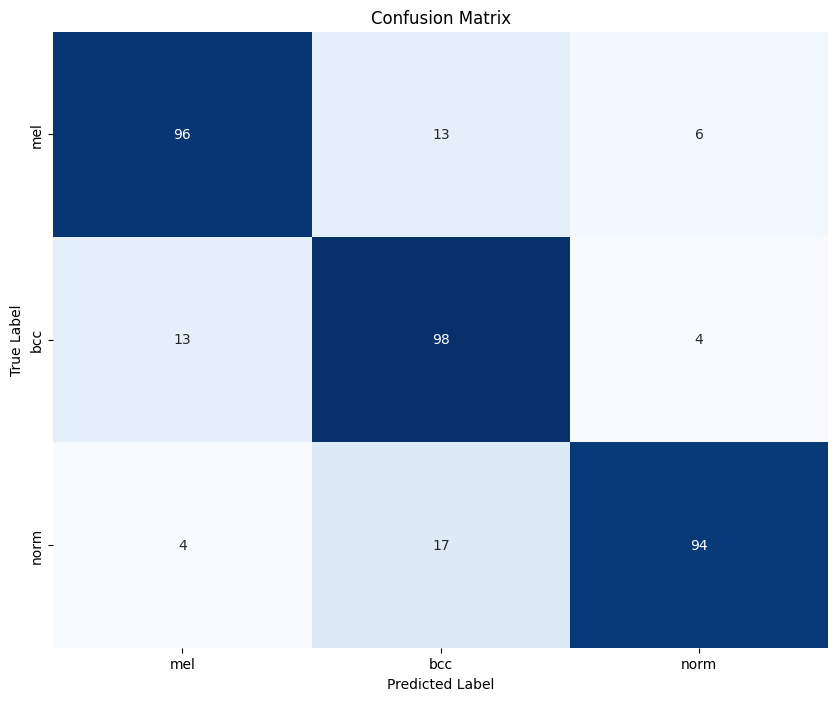

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Confusion Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# Menampilkan Confusion Matrix dengan label yang tepat
plt.figure(figsize=(10, 8))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Mendapatkan nama kelas dari variabel class_names
class_names = ['mel', 'bcc', 'norm']

# Menambahkan label ke sumbu x dan y
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, ha='center')
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, va='center')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Memuat model SVM terbaik yang sudah disimpan sebelumnya
best_svm = joblib.load('best_svm_model.pkl')

# Parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=best_svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan grid search
grid_search.fit(train_features, train_labels)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# Best parameters obtained from GridSearchCV
best_params = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
precisions = []
sensitivities = []
specificities = []
f1_scores = []
best_accuracy = 0
best_model = None
best_confusion_matrix = None
best_classification_report = None

for fold, (train_index, test_index) in enumerate(skf.split(combined_features_array, labels_array)):
    train_features, test_features = combined_features_array[train_index], combined_features_array[test_index]
    train_labels, test_labels = labels_array[train_index], labels_array[test_index]

    svm = SVC(**best_params)
    svm.fit(train_features, train_labels)

    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    accuracies.append(accuracy)

    precision = precision_score(test_labels, predictions, average='weighted')
    precisions.append(precision)

    recall = recall_score(test_labels, predictions, average='weighted')
    sensitivities.append(recall)

    cm = confusion_matrix(test_labels, predictions)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    specificity = np.mean(specificity)
    specificities.append(specificity)

    f1 = f1_score(test_labels, predictions, average='weighted')
    f1_scores.append(f1)

    print(f'Fold {fold + 1}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Sensitivity: {recall:.4f}, Specificity: {specificity:.4f}, F1-score: {f1:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm
        best_confusion_matrix = cm
        best_classification_report = classification_report(test_labels, predictions)
        joblib.dump(best_model, 'best_svm_model_tuning.pkl')

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)
average_f1 = np.mean(f1_scores)

print(f'Average accuracy: {average_accuracy:.4f}, Best accuracy: {best_accuracy:.4f}')
print("Best Confusion Matrix:")
print(best_confusion_matrix)
print("Best Classification Report:")
print(best_classification_report)

print(f'Average Precision: {average_precision:.4f}')
print(f'Average Sensitivity: {average_sensitivity:.4f}')
print(f'Average Specificity: {average_specificity:.4f}')
print(f'Average F1-score: {average_f1:.4f}')

Fold 1, Accuracy: 0.9072, Precision: 0.9075, Sensitivity: 0.9072, Specificity: 0.9072, F1-score: 0.9073
Fold 2, Accuracy: 0.9014, Precision: 0.9016, Sensitivity: 0.9014, Specificity: 0.9014, F1-score: 0.9015
Fold 3, Accuracy: 0.8754, Precision: 0.8777, Sensitivity: 0.8754, Specificity: 0.8754, F1-score: 0.8760
Fold 4, Accuracy: 0.8667, Precision: 0.8699, Sensitivity: 0.8667, Specificity: 0.8667, F1-score: 0.8668
Fold 5, Accuracy: 0.8870, Precision: 0.8882, Sensitivity: 0.8870, Specificity: 0.8870, F1-score: 0.8873
Average accuracy: 0.8875, Best accuracy: 0.9072
Best Confusion Matrix:
[[100   9   6]
 [  9 106   0]
 [  5   3 107]]
Best Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       115
           1       0.90      0.92      0.91       115
           2       0.95      0.93      0.94       115

    accuracy                           0.91       345
   macro avg       0.91      0.91      0.91       345
weighted 

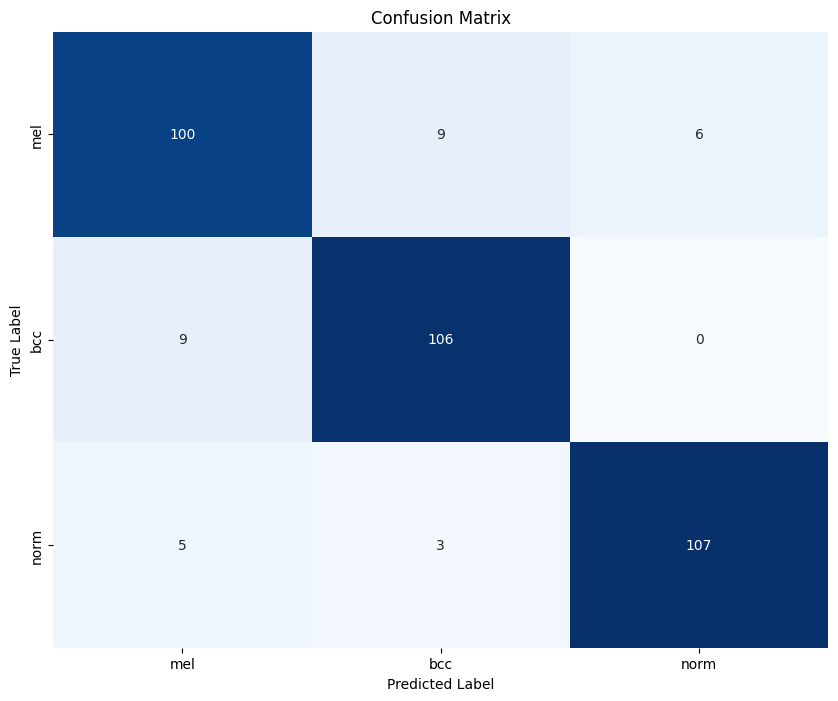

In [ ]:
# Menampilkan Confusion Matrix dengan label yang tepat
plt.figure(figsize=(10, 8))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Mendapatkan nama kelas dari variabel class_names
class_names = ['mel', 'bcc', 'norm']

# Menambahkan label ke sumbu x dan y
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, ha='center')
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, va='center')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()